# Evolutionary Optimization

- **Optimization** is the final and most important step for most oil and gas-related problems.

### Genetic Algorithm
- In the **mid-20th century**, computer scientists began drawing inspiration from **nature**, particularly **natural evolution**, to tackle challenging optimization problems involving extensive searches among a vast number of alternatives.
- The **genetic algorithm** was:
  - **Introduced by Rechenberg** and later **developed by John Holland** in the **1960s–1970s** (Rajasekaran & Pai, 2013).
  - Based primarily on **Darwin's theory of "survival of the fittest."**
- In the **1990s**, **John Koza** introduced **"genetic programming,"** which uses genetic algorithms to find the **best computer programs** for solving a given task (Mohaghegh, 2000).

### Steps in a Genetic Algorithm
The genetic algorithm involves the following steps, repeated until a specified criterion is met:
1. **Population Initialization**
2. **Fitness Calculation**
3. **Parent Selection**
4. **Crossover Operation**
5. **Mutation**

- A schematic representation of these steps is illustrated in **Fig. 9.2**.


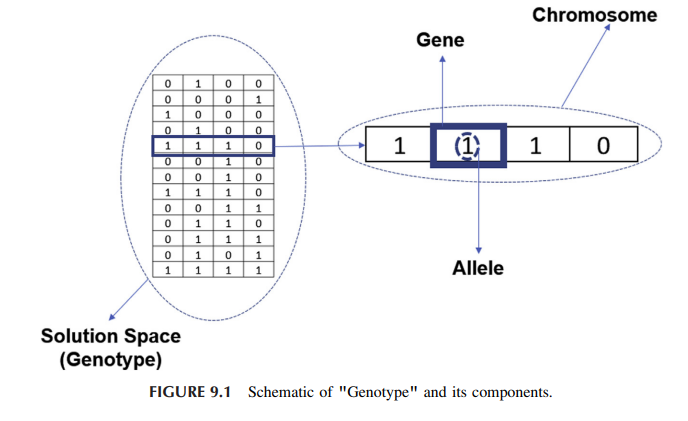
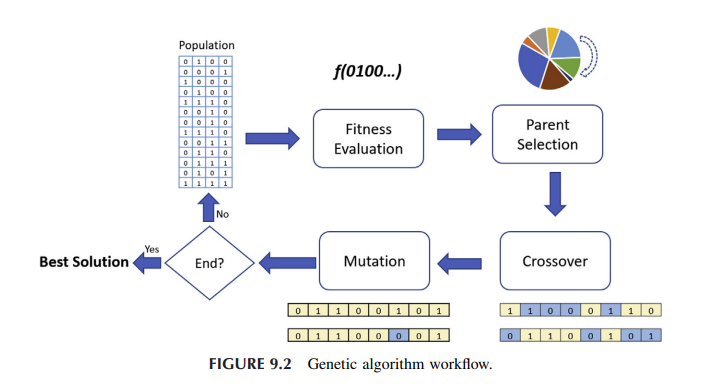

# Step 1 - Population Initialization

In [1]:
#Variables Initialization
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

seed = 11
random.seed(seed)

up_limit, low_limit = 30, -30

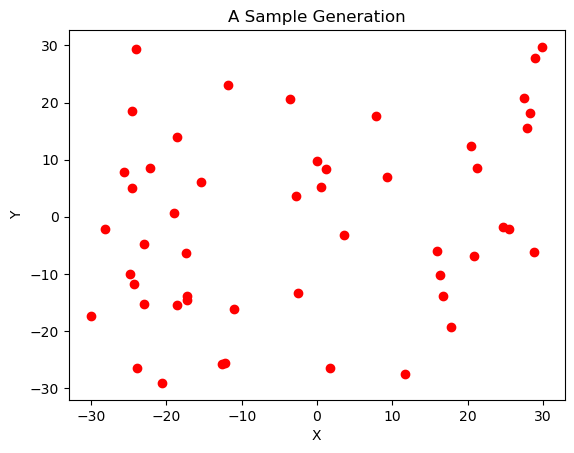

In [2]:
#Population Initialization
# Define the Method to Generate a population by choosing samples
#uniformly at random from the range specified

def gen_sample_population(size, x_limits, y_limits):
    x_low, x_up = x_limits
    y_low, y_up = y_limits
    
    population = np.zeros((size, 2))
    
    for i in range(size):
        population[i,0] = random.uniform(x_low, x_up)
        population[i,1] = random.uniform(y_low, y_up)
    
    return population


# Producing a population
population = gen_sample_population(size = 50, x_limits = (low_limit, up_limit),
                                              y_limits = (low_limit, up_limit))

# Plot the individual pairs in a sample generation
fig, ax0 = plt.subplots(1,1)
ax0.set_title('A Sample Generation')
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.plot(population[:,0],population[:,1],'ro')

Let's break down the code in detail:

### Step 1: Import Required Libraries
```python
import numpy as np
import matplotlib.pyplot as plt
import random
```
- `numpy`: Used for numerical operations and creating arrays.
- `matplotlib.pyplot`: Used for plotting graphs.
- `random`: Provides functions for generating random numbers.

### Step 2: Define the Method to Generate a Population
```python
def gen_sample_population(size, x_limits, y_limits):
    x_low, x_up = x_limits
    y_low, y_up = y_limits
    
    population = np.zeros((size, 2))
    
    for i in range(size):
        population[i,0] = random.uniform(x_low, x_up)
        population[i,1] = random.uniform(y_low, y_up)
    
    return population
```

#### Breaking Down the Function:
1. **Function Definition**:
   - `gen_sample_population` is a function that generates a population of individuals (points), where each individual is represented by two coordinates: `X` and `Y`.
   - **Parameters**:
     - `size`: The number of individuals (points) to generate.
     - `x_limits`: A tuple specifying the lower and upper limits for the `X` coordinate (e.g., `(x_low, x_up)`).
     - `y_limits`: A tuple specifying the lower and upper limits for the `Y` coordinate (e.g., `(y_low, y_up)`).

2. **Unpacking the Limits**:
   ```python
   x_low, x_up = x_limits
   y_low, y_up = y_limits
   ```
   - This separates the lower and upper limits for both the `X` and `Y` axes.

3. **Initialize the Population Array**:
   ```python
   population = np.zeros((size, 2))
   ```
   - Creates a `size x 2` array filled with zeros. This array will hold the `X` and `Y` coordinates of each individual in the population.

4. **Generate Random Values for Each Individual**:
   ```python
   for i in range(size):
       population[i,0] = random.uniform(x_low, x_up)
       population[i,1] = random.uniform(y_low, y_up)
   ```
   - Loops through each index from `0` to `size-1`:
     - `population[i, 0]`: Sets the `X` coordinate by generating a random number within the range `[x_low, x_up]`.
     - `population[i, 1]`: Sets the `Y` coordinate by generating a random number within the range `[y_low, y_up]`.

5. **Return the Generated Population**:
   ```python
   return population
   ```
   - Returns the array containing the generated population of size `size`, where each individual is represented as a pair of `X` and `Y` coordinates.

### Step 3: Generate the Population
```python
population = gen_sample_population(size=50, x_limits=(low_limit, up_limit), y_limits=(low_limit, up_limit))
```
- **size=50**: Generates a population of 50 individuals.
- **x_limits and y_limits**: Set to `(low_limit, up_limit)`, specifying the range for both `X` and `Y` values. The `low_limit` and `up_limit` variables should be defined elsewhere in the code to specify the limits.

### Step 4: Plot the Generated Population
```python
fig, ax0 = plt.subplots(1, 1)
ax0.set_title('A Sample Generation')
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.plot(population[:, 0], population[:, 1], 'ro')
```

#### Breaking Down the Plotting Code:
1. **Create the Plot**:
   - `fig, ax0 = plt.subplots(1, 1)`: Sets up a figure with one subplot (`ax0`).
   
2. **Set Plot Title and Labels**:
   - `ax0.set_title('A Sample Generation')`: Sets the title of the plot.
   - `ax0.set_xlabel('X')`: Labels the x-axis.
   - `ax0.set_ylabel('Y')`: Labels the y-axis.
   
3. **Plot the Population Data**:
   - `ax0.plot(population[:, 0], population[:, 1], 'ro')`: Plots the `X` and `Y` coordinates of the population.
     - `population[:, 0]`: The `X` values.
     - `population[:, 1]`: The `Y` values.
     - `'ro'`: Specifies that the points should be plotted as red circles (`r` for red, `o` for circle).

### Summary
1. **The function `gen_sample_population` generates a population of individuals with random `X` and `Y` coordinates within specified limits.**
2. **The population is then visualized in a scatter plot, where each point represents an individual in the population.**

# Step 2 - Fitness Calculation
* This is where the quality of each solution is
calculated by `"fitness function."`

* This function receives the solution as an
input and returns an output that represents how fit or appropriate the solution is
for the optimization problem.

* A simple fitness function with one global maxima with
form $ f(x,y)=5-(x^2+y^2) $ is defined in following codes and the function is
plotted.

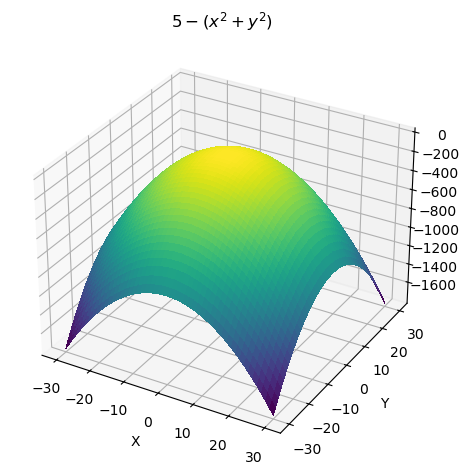

In [3]:
#Fitness Function
# defining the fitness function which is f(x,y)¼5 -(xˆ2 þ yˆ2)
def function(point):
    return (5 - (point[0]**2 + point[1]**2))

#plot the fitness function
from mpl_toolkits.mplot3d import Axes3D
n=50

# linspace returns n equally spaced values over the interval low_limit
#to up_limit
x_vals = np.linspace(low_limit, up_limit, n+1)
y_vals = np.linspace(low_limit, up_limit, n+1)

# meshgrid returns the coordinate matrices by combining all the
#combinations of x_vals and y_vals and creates an n*n x and y spaces

x, y = np.meshgrid(x_vals, y_vals)
z = np.zeros_like(x)

# two nested loops to iterate over all 50 * 50 space for x and y values
for i in range(n+1):
    for j in range(n+1):
        z[i,j] = function([x[i,j], y[i,j]])


#Plot the 3D plot
fig = plt.figure()

#adding 3d projection for the plot
ax0 = fig.add_subplot(111, projection = '3d')
surf = ax0.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                        linewidth = 0, antialiased = False)

#r'' will allow for adding latex code in the title, $$ indicates a latex
#formula
ax0.set_title(r'$5-(x^2+y^2)$')
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
plt.tight_layout()

Let's break down this code step by step, explaining each detail:

### Step 1: Define the Fitness Function
```python
def function(point):
    return (5 - (point[0]**2 + point[1]**2))
```
- **Purpose**: Defines the fitness function, which will evaluate how "fit" or "good" a point is based on its coordinates `(x, y)`.
- **Formula Explanation**: The function returns the value of \( 5 - (x^2 + y^2) \), where:
  - \( x \) and \( y \) are the coordinates provided in the `point` array.
  - \( 5 \) is a constant value that serves as the maximum value the function can return (when \( x = 0 \) and \( y = 0 \)).
  - \( x^2 + y^2 \) is the squared distance from the origin, which will be subtracted from 5.
- **Interpretation**: The fitness function decreases as the distance from the origin increases, with its highest value at the origin.

### Step 2: Import Required Libraries for 3D Plotting
```python
from mpl_toolkits.mplot3d import Axes3D
```
- **Purpose**: Imports `Axes3D` from `mpl_toolkits.mplot3d`, allowing for the creation of 3D plots.

### Step 3: Set Up the Number of Intervals
```python
n = 50
```
- **Explanation**: Sets `n` to 50, meaning there will be 50 intervals along each axis (x and y). This results in a grid of \( 51 \times 51 \) points (since `n + 1` values are used).

### Step 4: Generate Linearly Spaced Values
```python
x_vals = np.linspace(low_limit, up_limit, n+1)
y_vals = np.linspace(low_limit, up_limit, n+1)
```
- **`np.linspace` Explanation**: 
  - `np.linspace(low_limit, up_limit, n+1)` generates `n + 1` equally spaced values between `low_limit` and `up_limit`.
  - `x_vals` and `y_vals` represent the grid of points over which the fitness function will be evaluated.

### Step 5: Create the Mesh Grid
```python
x, y = np.meshgrid(x_vals, y_vals)
z = np.zeros_like(x)
```
- **`np.meshgrid` Explanation**:
  - `np.meshgrid(x_vals, y_vals)` creates two 2D arrays `x` and `y` that represent all combinations of the values in `x_vals` and `y_vals`.
  - This allows for easy iteration over a grid of \( 51 \times 51 \) points.
- **`z = np.zeros_like(x)`**:
  - Initializes an array `z` with the same shape as `x`, filled with zeros.
  - This array will store the fitness values for each point `(x, y)`.

### Step 6: Calculate the Fitness for Each Point
```python
for i in range(n+1):
    for j in range(n+1):
        z[i, j] = function([x[i, j], y[i, j]])
```
- **Nested Loops Explanation**:
  - The outer loop iterates over each row index `i` (from 0 to `n`), and the inner loop iterates over each column index `j` (from 0 to `n`).
- **Fitness Calculation**:
  - For each grid point `(x[i, j], y[i, j])`, the fitness function is evaluated using `function([x[i, j], y[i, j]])`.
  - The result is stored in the corresponding position `z[i, j]`, creating a matrix of fitness values.

### Step 7: Plot the 3D Surface
```python
fig = plt.figure()
```
- **Explanation**: Creates a new figure for the plot.

### Step 8: Add a 3D Axes to the Figure
```python
ax0 = fig.add_subplot(111, projection='3d')
```
- **Explanation**: Adds a 3D subplot (`ax0`) to the figure. The `projection='3d'` argument specifies that this will be a 3D plot.

### Step 9: Plot the Surface
```python
surf = ax0.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0, antialiased=False)
```
- **Parameters Explanation**:
  - `x`, `y`, and `z`: The coordinates and corresponding fitness values for the 3D surface plot.
  - `rstride=1` and `cstride=1`: The row and column stride, indicating how many rows and columns to skip while plotting. Setting them to 1 ensures every point is plotted.
  - `cmap='viridis'`: Sets the colormap to "viridis," which provides a gradient of colors.
  - `linewidth=0`: No lines are drawn on the surface.
  - `antialiased=False`: Turns off antialiasing for better performance.

### Step 10: Set the Title and Axis Labels
```python
ax0.set_title(r'$5-(x^2+y^2)$')
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
```
- **Explanation**:
  - `ax0.set_title(r'$5-(x^2+y^2)$')`: Sets the title using LaTeX formatting for a mathematical expression.
  - `ax0.set_xlabel('X')` and `ax0.set_ylabel('Y')`: Label the x and y axes.

### Step 11: Adjust Layout and Display the Plot
```python
plt.tight_layout()
plt.show()
```
- **`plt.tight_layout()`**: Adjusts the layout to ensure that labels, titles, and other plot elements fit within the figure.
- **`plt.show()`**: Displays the final plot.

### Summary
1. **The code defines a fitness function** \( 5 - (x^2 + y^2) \), which decreases as the distance from the origin increases.
2. **Generates a grid of points** over specified limits and calculates the fitness value for each point.
3. **Plots the fitness function** as a 3D surface, where the height represents the fitness value for each point on the grid.

# Step 3 - Parent Selection
* When the fitness of all the solutions is determined, parent selection process chooses which solutions should
be paired as parents to generate the offsprings for the `next iteration (generation).`

* There are various parent selection methods such as
    - Roulette wheel
    - Boltzmann
    - Tournament
    - Rank
    - Steady-state
    - Random selection.

In [4]:
#Parent Selection: Roulette
# select fit individuals as parents

def roul_choice(sorted_population):
    func_vals = np.array([function(x) for x in sorted_population])
    min_fitness = func_vals[0]
    
    # Make all fitness values positive so probabilities can be calculated
    #next
    if min_fitness < 0:
        func_vals += -min_fitness
    fitness_sum = sum(func_vals)
    
    # Draw a random variable from uniform distribution
    rand = random.uniform(0, 1)
    acc = 0
    
    for i in range(len(sorted_population)):
        fitness = func_vals[i]
        
        # Probability of each individual being selected is calculated
        prob = fitness/fitness_sum
        acc += prob
        if rand <= acc:
            return sorted_population[i]

Let's break down the code for parent selection using the roulette wheel method step by step:

### Step 1: Define the Function for Parent Selection
```python
def roul_choice(sorted_population):
```
- **Purpose**: `roul_choice` is a function that implements the roulette wheel selection method to choose an individual from a population, giving more "fit" individuals a higher probability of being selected.

### Step 2: Calculate Fitness Values for the Population
```python
func_vals = np.array([function(x) for x in sorted_population])
min_fitness = func_vals[0]
```
- **Explanation**:
  - `func_vals = np.array([function(x) for x in sorted_population])`:
    - Computes the fitness for each individual in the population using the fitness function defined earlier (`5 - (x^2 + y^2)`).
    - `sorted_population` is a list of individuals, where each individual is represented by coordinates (x, y).
    - `func_vals` is a numpy array that holds the fitness values of each individual.
  - `min_fitness = func_vals[0]`:
    - Assumes the population is sorted based on fitness, with the first element being the minimum fitness value.

### Step 3: Make All Fitness Values Positive
```python
if min_fitness < 0:
    func_vals += -min_fitness
```
- **Explanation**:
  - If the minimum fitness value is negative, all fitness values are shifted upward by adding the absolute value of `min_fitness` to each element in `func_vals`.
  - This ensures that all fitness values are non-negative, allowing the probabilities for selection to be calculated correctly.

### Step 4: Calculate the Sum of Fitness Values
```python
fitness_sum = sum(func_vals)
```
- **Explanation**:
  - Computes the total sum of all fitness values, which will be used to normalize the probabilities for selection.

### Step 5: Generate a Random Number
```python
rand = random.uniform(0, 1)
acc = 0
```
- **Explanation**:
  - `rand = random.uniform(0, 1)`: Draws a random number between 0 and 1 from a uniform distribution. This number will be used to determine which individual is selected.
  - `acc = 0`: Initializes an accumulator that will be used to sum up the probabilities.

### Step 6: Iterate Over the Population to Select an Individual
```python
for i in range(len(sorted_population)):
    fitness = func_vals[i]
    
    # Probability of each individual being selected is calculated
    prob = fitness / fitness_sum
    acc += prob
    
    if rand <= acc:
        return sorted_population[i]
```
- **Explanation**:
  - The loop iterates through each individual in `sorted_population`:
    - `fitness = func_vals[i]`: Retrieves the fitness value for the current individual.
    - `prob = fitness / fitness_sum`: Calculates the probability of selecting the current individual. This is done by dividing the fitness of the individual by the total sum of all fitness values.
    - `acc += prob`: Adds the current probability to the accumulator `acc`.
  - **Selection Condition**:
    - `if rand <= acc`: Checks if the random number `rand` is less than or equal to the accumulated probability.
    - If this condition is met, the current individual (`sorted_population[i]`) is returned as the selected parent.

### Summary of Roulette Wheel Selection
1. **Fitness values are computed for the entire population**, with all values adjusted to be non-negative.
2. **The fitness values are used to calculate selection probabilities**, giving individuals with higher fitness a greater chance of being selected.
3. **A random number is drawn** to simulate spinning a roulette wheel, and the cumulative probabilities are used to determine which individual is selected as a parent.
4. **The function returns one individual** from the population based on this selection process.

# Step 4 - Crossover Operation
* When the parents are selected and coupled, their chromosomes should be combined to generate offspring.

* The combination of the genetic information of the
chromosomes is done with crossover operation.

*  In `"One Point"` or `"Single Site"`
crossover operation, a break location in the chromosomes is selected randomly
and divides the chromosomes into two segments (tutorialspoint).

* The gene information from the second segments is swapped between chromosomes to
generate offspring.

* In "Two-point" crossover
operation, instead of one break location, two break locations are selected
randomly.

* Then gene information between two break locations is exchanged between parents to generate offspring as shown in Fig. 9.7.

* Below is a simple crossover which takes an average of parents values to
create children (for the real numbers, geometric mean or arithmetic mean for
the cross over can be used):

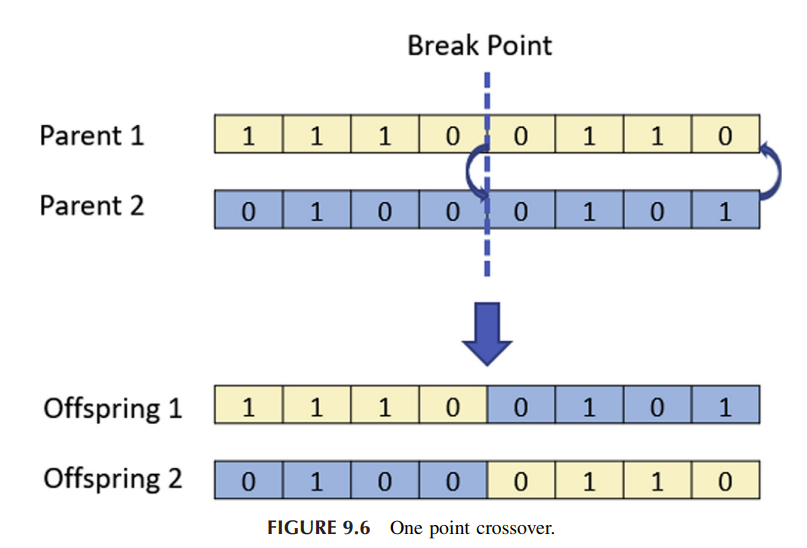

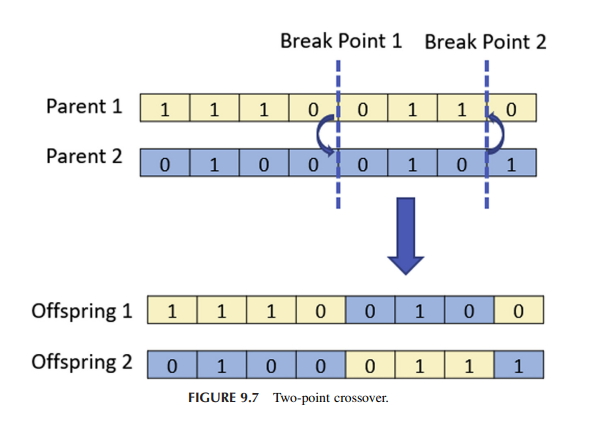

In [5]:
#Crossover
def crossover(point_1, point_2):
    return [(point_1[0] + point_2[0])/2, (point_1[1] + point_2[1])/2]

# Step 5 - Mutation
* `"Mutation"` happens after the offspring chromosomes are generated by
crossover operation, where some of the genes are tweaked to add diversity to
the new generation.

* This process is called `Mutation`.

* The most common mutation operator is `"Bit Flip."` In the "Bit Flip" mutation, random bit/bits are
selected and then the allele (value) of the bit/bits is flipped as shown in
Fig. 9.9.
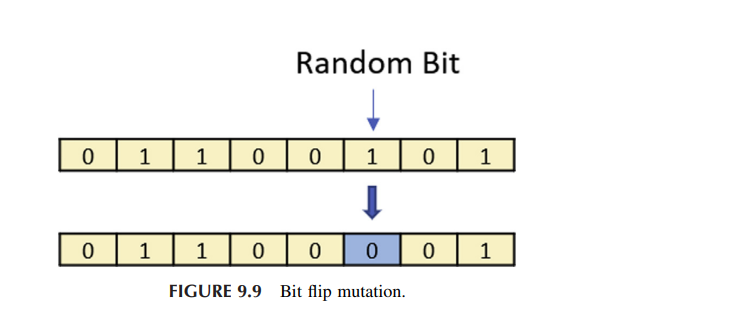

In [6]:
#Mutation
def mutate(point):
    mute_x = point[0] + random.uniform(-0.5, 0.5)
    mute_y = point[1] + random.uniform(-0.5, 0.5)
    # Guarantee to be kept inside boundaries
    mute_x = min(max(mute_x, low_limit), up_limit)
    mute_y = min(max(mute_y, low_limit), up_limit)
    
    return [mute_x,mute_y]

Let's break down the code for the mutation step in detail:

### Step 1: Define the Mutation Function
```python
def mutate(point):
```
- **Purpose**: `mutate` is a function that introduces random variations (mutations) to an individual's coordinates `(x, y)`, aiming to maintain diversity in the population during evolutionary optimization.

### Step 2: Apply Random Mutation to Each Coordinate
```python
mute_x = point[0] + random.uniform(-0.5, 0.5)
mute_y = point[1] + random.uniform(-0.5, 0.5)
```
- **Explanation**:
  - `mute_x = point[0] + random.uniform(-0.5, 0.5)`:
    - A random number between -0.5 and 0.5 is added to the original x-coordinate (`point[0]`), creating a new mutated x-coordinate (`mute_x`).
  - `mute_y = point[1] + random.uniform(-0.5, 0.5)`:
    - Similarly, a random number between -0.5 and 0.5 is added to the original y-coordinate (`point[1]`), resulting in a new mutated y-coordinate (`mute_y`).
- **Purpose**: The random addition simulates the mutation process by slightly altering the position of the individual in the search space.

### Step 3: Ensure the Mutated Values Stay Within Specified Boundaries
```python
mute_x = min(max(mute_x, low_limit), up_limit)
mute_y = min(max(mute_y, low_limit), up_limit)
```
- **Explanation**:
  - `mute_x = min(max(mute_x, low_limit), up_limit)`:
    - Ensures that the mutated x-coordinate (`mute_x`) stays within the allowed range, defined by `low_limit` and `up_limit`.
    - `max(mute_x, low_limit)`: If `mute_x` is less than `low_limit`, it is set to `low_limit`.
    - `min(max(mute_x, low_limit), up_limit)`: If `mute_x` exceeds `up_limit`, it is set to `up_limit`.
  - The same process is applied to `mute_y` to keep it within the specified boundaries.
- **Purpose**: This step guarantees that the mutated individual remains within the defined search space, avoiding invalid values.

### Step 4: Return the Mutated Point
```python
return [mute_x, mute_y]
```
- **Explanation**: Returns the new coordinates `[mute_x, mute_y]` after mutation.

### Summary of the Mutation Function
1. **The mutation function introduces random changes to the coordinates** of an individual within a specified range.
2. **It ensures that the mutated coordinates remain within defined boundaries** by clamping the values to the limits.
3. **The function returns the mutated individual**, providing a slightly altered version of the original point to maintain genetic diversity in the population.

# Important Notice
* In this code,mutation is done by adding a small random value to the individual. It is necessary to make sure the mutated values fall into the specified
range.

* All these steps (ii)-(v) are wrapped in the following method called
make_next_generation.

In [7]:
#Make Next Generation: steps (ii)-(v)
# (ii) Fitness Function used for (iii) Parents selection and then (iv)
#Crossover and (v) Mutation used to Generate next generation

def offspring_generation(curr_population):
    next_generation = np.zeros(np.shape(curr_population))
    
    # Sort items in the previous_population array based on their function value
    sorted_population = sorted(curr_population, key = function)
    
    population_size = len(curr_population)
    
    for i in range(population_size):
        # (iii) Parent Selection
        first_parent = roul_choice(sorted_population)
        second_parent = roul_choice(sorted_population)
        
        # Crossover
        offspring = crossover(first_parent, second_parent)
        
        # Mutation
        offspring = mutate(offspring)
        next_generation[i,:] = offspring
        
    return next_generation

Generation: 1  Best individual:  [ 3.8529783  -0.90858855]
Iteration number:  2
Generation: 2  individual:  [1.03761594 0.21110756] Improves the optimal value by amount  14.549761734166264
Iteration number:  3
Generation: 3  individual:  [-0.21404365  0.11250848] Improves the optimal value by amount  1.0627403937089221
Iteration number:  4
Iteration number:  5
Iteration number:  6
Iteration number:  7
Iteration number:  8
Iteration number:  9
Iteration number:  10
Iteration number:  11
Iteration number:  12
Iteration number:  13
Iteration number:  14
Iteration number:  15
Iteration number:  16
Iteration number:  17
Iteration number:  18
Generation: 18  individual:  [-0.08647899 -0.05199596] Improves the optimal value by amount  0.0482906487978747
Iteration number:  19
Iteration number:  20
Iteration number:  21
Iteration number:  22
Generation: 22  individual:  [0.02562615 0.00707678] Improves the optimal value by amount  0.009475414914703606
Iteration number:  23
Iteration number:  24

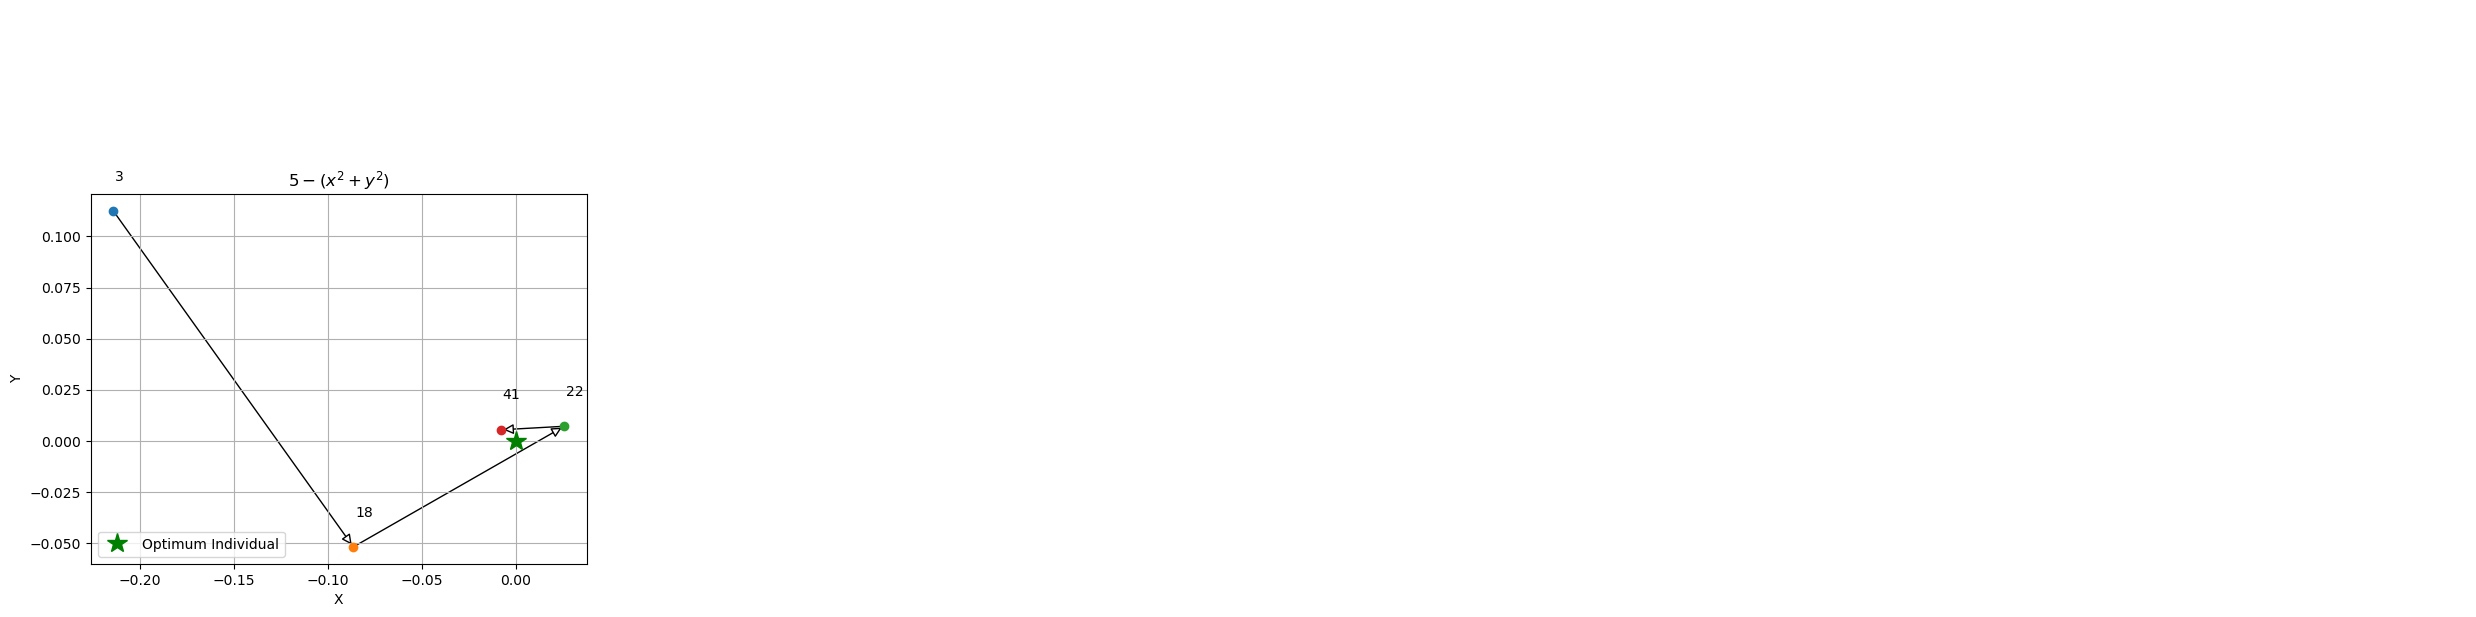

In [9]:
#Genetics Algorithm Workflow

from matplotlib.patches import ConnectionPatch

#Perform the Genetics Algorithm to generate generations and find the
#best individuals in each generation

generations = 100
best_val = float('-inf')
best_pair = np.zeros((2))
prev_best_pair = np.zeros_like(best_pair)
best_population = -1

# Threshold for improvement in order to continue the search
threshold = 10e-5
stop = False
coordsA = "data"
coordsB = "data"

fig, ax0 = plt.subplots(1,1)
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.set_title(r'$5-(x^2+y^2)$')
ax0.grid(True)

# Mark the optimum Individuals [0,0] as a star
ax0.plot([0], [0], 'g*', markersize = 15, linewidth = 0.15,
         label = 'Optimum Individual')

ax0.legend(loc = 'lower left')


# (i) Population Initialization
population = gen_sample_population(size = 50, x_limits = (low_limit, up_limit),
                                   y_limits = (low_limit, up_limit))

# (ii) Fitness Function Calculation
func_vals = np.array([function(x) for x in population])
gen_max_val = max(func_vals)
best_population = 1

# Update the best value obtained so far
best_val = gen_max_val
best_pair = population[np.argmax(func_vals),:]
print('Generation:' , 1, ' Best individual: ',best_pair)

# Loop through the number of generations
for i in range(1, generations):
    print("Iteration number: ", i + 1)


    # (ii) Fitness Function used for (iii) Parents selection and then (iv)
    #Crossover and (v) Mutation used to Generate next generation
    
    population = offspring_generation(population)
    func_vals = np.array([function(x) for x in population])
    gen_max_val = max(func_vals)
    
    # check if this generation maximum value (gen_max_val) is better than
    #our best value (best_val) found thus far.
    
    if (gen_max_val > best_val):
        diff = abs(gen_max_val - best_val)
        
        # If the improvement amount (diff) is less than threshold set
        #stop = True => Break the loop, otherwise continue the search
        
        stop = True if diff < threshold else False
        best_population = i+1
        
        # Update the best value obtained so far
        
        best_val = gen_max_val
        prev_best_pair = np.copy(best_pair)
        best_pair = population[np.argmax(func_vals),:]
        print('Generation:' ,i + 1, ' individual: ',best_pair,
              'Improves the optimal value by amount ', diff )
        
        # If it is after iteration 1 plot the arrow to show the evolution to the
        #new best_pair
        
        if(i > 1):
            # plots the best_pair as points with 'o' marker on the plot
            ax0.plot([best_pair[0]],[best_pair[1]], 'o')
            
            # Mark each best_pair point with its iteration number (i þ 1)
            ax0.text(best_pair[0] + 0.001,
                     best_pair[1] + 0.015,'{}'.format(i + 1))
            
            # Create the arrow from prev_best_point to best_point to show the
            #evolution to the new individual (best_pair)
            
            con = ConnectionPatch(prev_best_pair, best_pair, coordsA = coordsA,
                                  coordsB = coordsB, arrowstyle = "-|>",
                                  shrinkA = 2, shrinkB = 2,
                                  mutation_scale = 15, fc = "w")
            ax0.add_artist(con)
        if (stop):
            break


# Print the final best individuals
print('Final Result is from iteration: ',best_population,
      ' for coordinates: ', best_pair , ' best value: ', best_val)

Let's break down the steps involved in generating the next generation using a genetic algorithm and its key components in detail:

### Step 1: Function to Generate Offspring
```python
def offspring_generation(curr_population):
    next_generation = np.zeros(np.shape(curr_population))
    sorted_population = sorted(curr_population, key=function)
    population_size = len(curr_population)
```
- **Explanation**:
  - `offspring_generation` generates the next generation of individuals using selection, crossover, and mutation.
  - `next_generation` is initialized as a zero array of the same shape as the current population.
  - `sorted_population` sorts the individuals based on their fitness values (from the fitness function). This helps in selecting parents.
  - `population_size` determines the number of individuals in the population.

### Step 2: Parent Selection, Crossover, and Mutation
```python
for i in range(population_size):
    # (iii) Parent Selection
    first_parent = roul_choice(sorted_population)
    second_parent = roul_choice(sorted_population)
    
    # Crossover
    offspring = crossover(first_parent, second_parent)
    
    # Mutation
    offspring = mutate(offspring)
    next_generation[i, :] = offspring
```
- **Explanation**:
  - The loop iterates over the population size to create new individuals.
  - **Parent Selection (iii)**:
    - Two parents are selected using the `roul_choice` function, which uses roulette wheel selection based on fitness values.
  - **Crossover (iv)**:
    - Combines the traits of the two selected parents to create an offspring.
  - **Mutation (v)**:
    - Introduces random changes to the offspring for diversity.
  - The resulting offspring is added to `next_generation`.

### Step 3: Return the New Generation
```python
return next_generation
```
- Returns the newly generated population for the next iteration.

### Step 4: Genetic Algorithm Workflow
```python
generations = 100
best_val = float('-inf')
best_pair = np.zeros((2))
prev_best_pair = np.zeros_like(best_pair)
best_population = -1
threshold = 10e-5
stop = False
```
- **Explanation**:
  - Sets the number of generations (`generations = 100`).
  - Initializes variables to track the best fitness value (`best_val`) and corresponding individual (`best_pair`).
  - `prev_best_pair` tracks the previous best individual to visualize progress.
  - `best_population` keeps track of the generation that produced the best value.
  - `threshold` sets the minimum improvement needed to continue searching.
  - `stop` is a flag used to determine if the optimization should terminate early.

### Step 5: Population Initialization
```python
population = gen_sample_population(size=50, x_limits=(low_limit, up_limit), y_limits=(low_limit, up_limit))
func_vals = np.array([function(x) for x in population])
gen_max_val = max(func_vals)
best_population = 1
best_val = gen_max_val
best_pair = population[np.argmax(func_vals), :]
```
- **Explanation**:
  - Generates an initial population of 50 individuals.
  - Calculates the fitness values for the initial population using the fitness function.
  - Finds the maximum fitness value (`gen_max_val`) and updates `best_val` and `best_pair` with this value.

### Step 6: Main Evolution Loop
```python
for i in range(1, generations):
    print("Iteration number: ", i + 1)
    population = offspring_generation(population)
    func_vals = np.array([function(x) for x in population])
    gen_max_val = max(func_vals)
    
    if gen_max_val > best_val:
        diff = abs(gen_max_val - best_val)
        stop = True if diff < threshold else False
        best_population = i + 1
        prev_best_pair = np.copy(best_pair)
        best_pair = population[np.argmax(func_vals), :]
        print('Generation:', i + 1, ' individual: ', best_pair, 'Improves the optimal value by amount ', diff)
        
        if i > 1:
            ax0.plot([best_pair[0]], [best_pair[1]], 'o')
            ax0.text(best_pair[0] + 0.001, best_pair[1] + 0.015, '{}'.format(i + 1))
            
            con = ConnectionPatch(prev_best_pair, best_pair, coordsA=coordsA, coordsB=coordsB, arrowstyle="-|>", shrinkA=2, shrinkB=2, mutation_scale=15, fc="w")
            ax0.add_artist(con)
        if stop:
            break
```
- **Explanation**:
  - Iterates over the generations to evolve the population.
  - **Offspring Generation**:
    - Uses `offspring_generation` to create the next generation.
  - **Fitness Evaluation**:
    - Computes fitness values for the new generation.
    - Updates `best_val`, `best_pair`, and `best_population` if the new generation contains a better individual.
  - **Improvement Check**:
    - If the improvement (`diff`) is below the threshold, the loop breaks.
  - **Visualization**:
    - Plots and tracks the evolution of the best individual over generations using arrows.

### Step 7: Final Output
```python
print('Final Result is from iteration:', best_population, 'for coordinates:', best_pair, 'best value:', best_val)
```
- **Explanation**: Prints the best individual and its fitness value after completing the genetic algorithm process.

### Summary
1. **Population Initialization**: Creates an initial population.
2. **Fitness Calculation**: Evaluates the fitness for each individual.
3. **Parent Selection**: Uses a selection process to choose parents for the next generation.
4. **Crossover and Mutation**: Generates offspring with variations.
5. **Evolution Loop**: Repeats the process over multiple generations to improve the solution.
6. **Stopping Condition**: The loop terminates if the improvement is below the threshold.

# Genetic algorithm: EUR optimization
* In this example, the objective is to use a genetic algorithm to find optimum
drilling and completions parameters that maximize a well’s `estimated ultimate
recovery (EUR)`.

* In order to do that, it is necessary to have a model that
predicts EUR of a well with respect to various geological, drilling, and
completion parameters.

* This model would be the fitness function that evaluates the effectiveness of drilling and completions jobs.

# Step 1 - Data Preparation
* The first step is to
    - `load the Shale Gas Well’s data`,
    - `define input and output`, 
    - `normalize the data to 0 to 1 range`,
    - `split the data into train and test`,
    - and finally `train a neural network`.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

#Import the data set
dataset = pd.read_csv('Chapter9_Shale Gas Wells.csv')
X = dataset.iloc[:,0:13]
y = dataset.iloc[:,13].values

# Fix the seed number for splitting the data into training and testing
seed = 15
np.random.seed(seed)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

#Specifying the neural network topology with MLPRegressor including 2
#hidden layers

global modelNN
modelNN = make_pipeline(MinMaxScaler(),
                        MLPRegressor(hidden_layer_sizes=(25,25),
                                     learning_rate_init=0.01,
                                     early_stopping=True, max_iter=500))

#Training the model
modelNN.fit(X_train, y_train)
print("Test R2 score: {:.2f}".format(modelNN.score(X_test,y_test)))

Test R2 score: 0.79


In [13]:
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    # Reshape the column vector X to a row vector X_Row
    X_Row = X.reshape(1,-1)
    
    # Return negative value for since GA minimizes the objective function
    return -1*modelNN.predict(X_Row)

#Lateral Length (4,500 ft to 11,500 ft) and Proppant loading (1100#/ft
#to 3200#/ft). The rest of the attributes should be equal to average.

#Dip attribute should be zero.
varbound = np.array([[0.0,0.0]]*13)
avg_vals = X.mean(axis = 0)

varbound[:,0] = avg_vals; varbound[:,1] = avg_vals
varbound[5,0] = 4500
varbound[5,1] = 11500
varbound[3,0] = 0
varbound[3,1] = 0
varbound[12,0] = 1100
varbound[12,1] = 3200

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.1% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

__________________________________________________ 0.2% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

 The best solution found:                                                                           
 [1.47640316e+02 3.51343874e+01 8.20158103e+02 0.00000000e+00
 1.62365613e+02 1.14983729e+04 6.30790514e+01 7.33754941e+00
 7.01049012e+03 1.92134387e+01 6.48454545e+01 9.30256917e-01
 3.19921888e+03]

 Objective function:
 -20.75896494617918


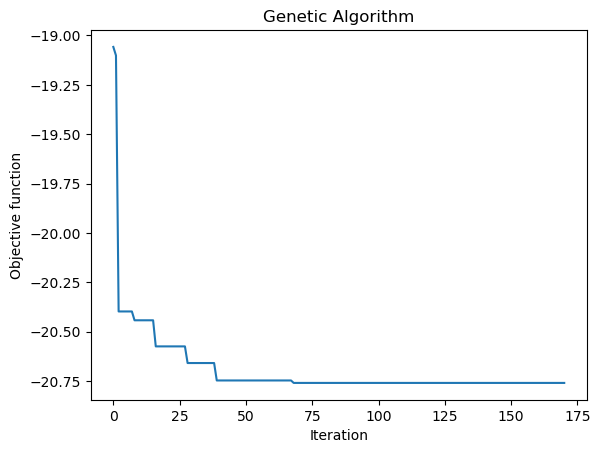

In [14]:
algorithm_param = {'max_num_iteration': None,
                   'population_size':100,'mutation_probability':0.1,
                   'elit_ratio': 0.1, 'crossover_probability': 0.5,
                   'parents_portion': 0.2, 'crossover_type':'uniform',
                   'max_iteration_without_improv':100}

model = ga(function = f, dimension = 13, variable_type = 'real',
           variable_boundaries=varbound, algorithm_parameters = algorithm_param)

model.run()
convergence = model.report
solution = model.output_dict

# Important Notice
* After 100 iterations from iteration number 70, no
improvement was observed in the fitness function.

* The solution of the optimization is in an array including all the attributes.

* Maximum gas EUR was
calculated to be 20.8Bcf with the optimized lateral length and proppant
loading of 11498 ft and 3199.9 lb/ft (attribute 6th and 13th in the array).

* In
order to visualize the space of solutions, a surface of calculated EUR values
versus combinations of lateral length and proppant loading values is plotted
with the following Python codes:

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\AppData\Local\Temp\ipykernel_10768\3109143493.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = -1 * f(item)
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\AppData\Local\Temp\ipykernel_10768\3109143493.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.

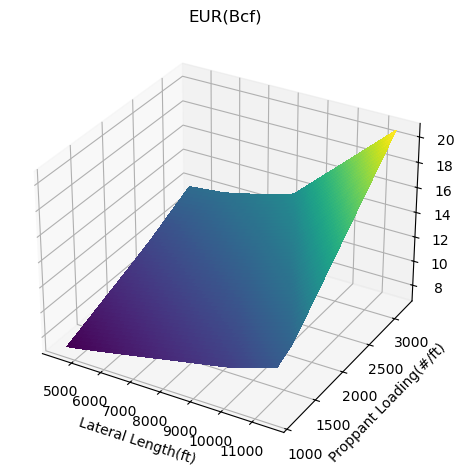

In [15]:
n = 100
m = 50
# linspace returns n and m equally spaced values over the interval
#passed to it

x_vals = np.linspace(4500,11500,n+1)
y_vals = np.linspace(1100,3200,m+1)

# meshgrid returns the coordinate matrices by combining all the
#combinations of x_vals and y_vals and creates an n*m x and y spaces

x,y = np.meshgrid(x_vals, y_vals)
z = np.zeros_like(x)
item = np.array([0.0]*13)
item [:] = avg_vals

for i in range(m+1):
    for j in range(n+1):
        item[3] = 0
        item[5] = x[i,j]
        item[12] = y[i,j]
        z[i,j] = -1 * f(item)
        
fig = plt.figure()

#adding 3d projection for the plot
ax0 = plt.axes(projection = '3d')

surf = ax0.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                        linewidth = 0, antialiased = False)

ax0.set_xlabel('Lateral Length(ft)')
ax0.set_ylabel('Proppant Loading(#/ft)')
ax0.set_title('EUR(Bcf)')
plt.tight_layout()

The warnings and the code can be broken down and addressed as follows:

### Warnings Explained:
1. **DeprecationWarning**:
   - Message: `"Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation."`
   - Cause: It appears when trying to assign a multi-dimensional array result to a scalar (`z[i, j]`). The `f(item)` function may be returning an array instead of a single scalar value.
   - Solution: Make sure `f(item)` returns a scalar value or access a specific element from the returned array if necessary (e.g., `f(item)[0]`).

2. **UserWarning**:
   - Message: `"X does not have valid feature names, but MinMaxScaler was fitted with feature names."`
   - Cause: This occurs when you are using a `MinMaxScaler` that was initially fitted with data containing feature names (e.g., a DataFrame) but now passing in an array without names.
   - Solution: Make sure to convert your array to a DataFrame with the same column names used for fitting, or ignore the warning if it does not affect the functionality.

### Code Review and Suggestions:

1. **Setting Up the Mesh Grid**:
   ```python
   n = 100
   m = 50
   x_vals = np.linspace(4500, 11500, n+1)
   y_vals = np.linspace(1100, 3200, m+1)
   x, y = np.meshgrid(x_vals, y_vals)
   z = np.zeros_like(x)
   item = np.array([0.0]*13)
   item[:] = avg_vals
   ```

2. **Looping Through the Grid and Evaluating `f(item)`**:
   ```python
   for i in range(m+1):
       for j in range(n+1):
           item[3] = 0
           item[5] = x[i, j]
           item[12] = y[i, j]
           # Ensure `f(item)` returns a scalar
           z_value = f(item)
           if np.isscalar(z_value):
               z[i, j] = -1 * z_value
           else:
               z[i, j] = -1 * z_value[0]  # Example: accessing the first element
   ```

3. **3D Plotting**:
   ```python
   fig = plt.figure()
   ax0 = plt.axes(projection='3d')
   surf = ax0.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0, antialiased=False)
   ax0.set_xlabel('Lateral Length (ft)')
   ax0.set_ylabel('Proppant Loading (#/ft)')
   ax0.set_title('EUR (Bcf)')
   plt.tight_layout()
   plt.show()
   ```

### Suggestions:
- Ensure the function `f(item)` returns a scalar if it is intended to be used for the assignment to `z[i, j]`.
- For the `MinMaxScaler` warning, you may choose to ignore the warning if the feature names are not relevant, or preprocess the input array to include column names.

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s

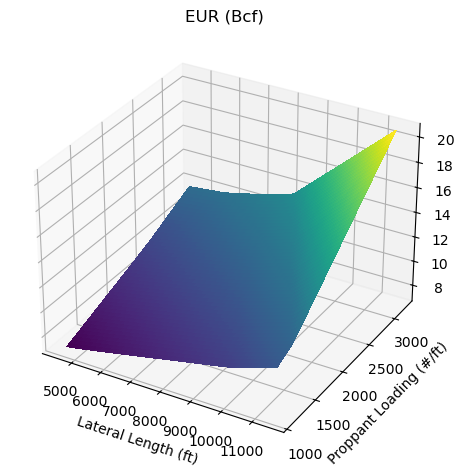

In [16]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
m = 50

# Generate linearly spaced values for the grid
x_vals = np.linspace(4500, 11500, n+1)
y_vals = np.linspace(1100, 3200, m+1)

# Create mesh grid
x, y = np.meshgrid(x_vals, y_vals)
z = np.zeros_like(x)

# Initialize item array
item = np.array([0.0] * 13)
item[:] = avg_vals  # Assuming avg_vals is defined elsewhere in your code

# Fill z values using the function f(item)
for i in range(m+1):
    for j in range(n+1):
        item[3] = 0
        item[5] = x[i, j]
        item[12] = y[i, j]
        
        # Ensure f(item) returns a scalar or extract an element from it
        z_value = f(item)
        if np.isscalar(z_value):
            z[i, j] = -1 * z_value
        else:
            z[i, j] = -1 * z_value[0]  # Example: accessing the first element if f(item) returns an array

# Plotting the 3D surface
fig = plt.figure()
ax0 = plt.axes(projection='3d')

# Plot the surface with specified settings
surf = ax0.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0, antialiased=False)

# Set labels and title
ax0.set_xlabel('Lateral Length (ft)')
ax0.set_ylabel('Proppant Loading (#/ft)')
ax0.set_title('EUR (Bcf)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Particle Swarm Optimization (PSO)

## Overview
- PSO is a nature-inspired optimization algorithm, similar to genetic algorithms.
- It mimics the behavior of swarming entities (e.g., bees, birds, fish) to find optimal solutions.
- Particles in the swarm exhibit sociocognitive behaviors, including:
  - Evaluating the environment
  - Comparing positions with others
  - Imitating better-performing individuals

## Introduction to PSO
- Introduced by Kennedy and Eberhart in 1995.
- Published in "Swarm Intelligence" (2001).
- PSO can optimize non-differentiable objective functions, unlike gradient-based optimizers.

## Applications in Various Fields
- **Oil and Gas Industry**:
  - Reservoir history matching (Mohamed et al., 2011): Estimating fault characteristics using oil and water rates.
  - Optimizing development plans (Isebor et al., 2013): Determining well numbers, locations, and control strategies.
  - Automated type-curve matching for pressure transient analysis (Al-Nemer et al., 2015): Estimating parameters in dual-porosity reservoirs.
  - Best well placement for maximizing NPV (Jesmani et al., 2015): Finding optimal distances and orientations of wells.
  - History matching for aquifer properties (Ottah et al., 2015): Using material balance techniques.
  - Reducing drilling costs (Self et al., 2016): Optimizing operational parameters to minimize cost per foot.
  - CO2-EOR optimization (Al-Mudhafar et al., 2017): Forecasting performance of shale oil reservoirs.
  - Maximizing oil recovery (Khan et al., 2018): Optimizing inflow control valve settings.
  - Multilayer geosteering (Yan et al., 2018): Estimating layer boundaries and resistivity using LWD measurements.
  - Other applications: Geophysical data inversion, rock slope stability analysis, reservoir model preselection, and production optimization.

## Particle Swarm Optimization Theory
- Example: Birds' swarm decision-making while landing.
  - Birds seek the best landing point for food while avoiding predators.
  - They communicate and share information, balancing personal and collective knowledge.
  - The bird closest to the food influences others to follow, leading to an optimal solution.


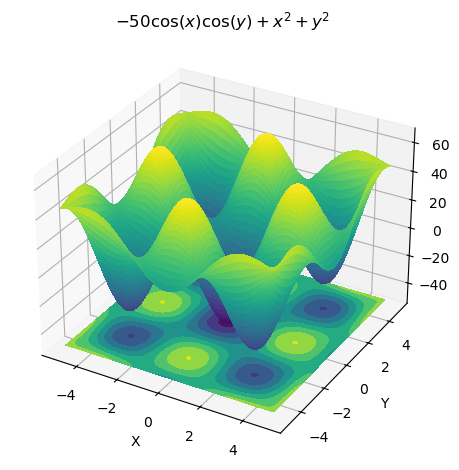

In [18]:
#3D plot
import numpy as np
import math
import random
import matplotlib.pyplot as plt

#function that models the problem
def function(position):
    return -50*math.cos(position[0]) * math.cos(position[1]) +\
    position[0]**2 + position[1]**2
    
#plot the fitness function
from mpl_toolkits.mplot3d import Axes3D
n = 100
low_limit = -5
up_limit = 5

# Creates n equally spaced values between low_limit and up_limit
x_vals = np.linspace(low_limit,up_limit,n+1)
y_vals = np.linspace(low_limit,up_limit,n+1)

# Create n*n matrices x and y with all combinations of x_vals and y_vals

x,y = np.meshgrid(x_vals, y_vals)
z = np.zeros_like(x)

for i in range(n+1):
    for j in range(n+1):
        z[i,j] = function([x[i,j], y[i,j]])

#Plot the 3D plot
fig = plt.figure()

#adding 3d projection to the plot
ax0 = plt.axes(projection = '3d')
surf = ax0.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
                        linewidth = 0, antialiased = False)

# Plot the contour plot of z values
ax0.contourf(x, y, z, zdir = 'z', offset = -50, cmap = 'viridis')
ax0.set_title(r'$-50\cos(x)\cos(y) + x^2 + y^2$')
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
plt.tight_layout()

In [19]:
#Parameter Initialization
#Initializing the velocity calculation parameters
w = 0.2
c1 = 0.5
c2 = 0.9
seed = 12

np.random.seed(seed)
n_itr = 50
threshold = 10e-05
n_particles = 50

In [23]:
#Variable Initialization
# (i) Particle position initialization

curr_pos = np.random.uniform(-30,30,(n_particles,2))
part_best_pos = curr_pos
part_best_val = np.array([float('inf') for _ in range(n_particles)])
glob_best_val = float('inf')
glob_best_prev_val = float('inf')
glob_best_pos = np.array([float('inf'), float('inf')])
velocity = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
markers = ['o', 'x', 'c*', 'r+' , 'bo', 'x']
c = 0

Iteration:  0
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
The best position is  [ 0.5697726  -1.11714082] in iteration number  50


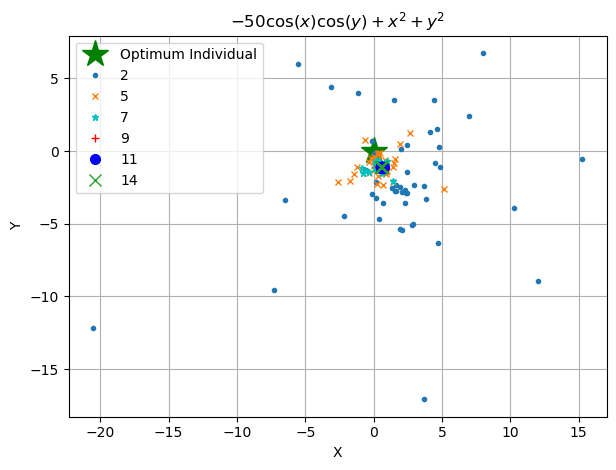

In [24]:
fig, ax0 = plt.subplots(1,1)
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.set_title(r'$-50\cos(x)\cos(y) + x^2 + y^2$')
ax0.grid(True)

# Mark the optimum Individuals [0,0] as a star
ax0.plot([0], [0], 'g*', markersize = 20, label = 'Optimum Individual')
ax0.legend(loc = 'lower left')
plt.tight_layout()

#Steps (ii)-(v)
for iteration in range (n_itr+1):
    
    print ('Iteration: ', iteration)
        
    for i in range(n_particles):
        
        # (ii) Evaluate fitness value
        fit_candidate = function(curr_pos[i])
        
        # (iii) Update particle best position and global best position
        if(part_best_val[i] >= fit_candidate):
            part_best_val[i] = fit_candidate
            part_best_pos[i] = curr_pos[i]
        
    part_vals = np.array([function(x) for x in curr_pos])
    parts_best_val = min(part_vals)
    best_part = curr_pos[np.argmin(part_vals),:]
    
    if(glob_best_val >= parts_best_val):
        glob_best_prev_val = glob_best_val
        glob_best_val = parts_best_val
        glob_best_pos = best_part
    
    # Plot selected iterations particles positions
    if (iteration in [2,5,7,9,11,14]):
        ax0.plot(part_best_pos[:,0], part_best_pos[:,1], markers[c],
                 label='{}'.format(iteration),markersize = c+3)
        c = c + 1
        
    # (iv) Update the particle velocities and new positions
    for i in range(n_particles):
        
        new_velocity = (w*velocity[i]) + (c1*np.random.uniform()) *\
        (part_best_pos[i] - curr_pos[i]) + (c2*np.random.uniform()) *\
        (glob_best_pos-curr_pos[i])
        
        new_position = new_velocity + curr_pos[i]
        curr_pos[i] = new_position
        velocity[i] = new_velocity
        
    # (v) Terminate if the termination condition is met
    if(abs(glob_best_val - glob_best_prev_val) < threshold):
        break

ax0.legend()
print("The best position is ", glob_best_pos, "in iteration number ", iteration)

# NPV Maximization example
* In this example, data from a work by Yu et al. (Yu & Sepehrnoori, 2013) are
used to optimize the design of hydraulically fractured horizontal wells with the
particle swarm optimization algorithm.

In [25]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

dataset = pd.read_csv('Chapter9_NPV Data Set.csv')

X = dataset.iloc[:,0:6]
y = dataset.iloc[:,6].values
print(dataset.describe())

seed = 15
np.random.seed(seed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)



        Porosity  Permeability(md)  Fracture-Half Length(ft)  \
count  38.000000         38.000000                 38.000000   
mean    0.061579          0.000292                300.000000   
std     0.016526          0.000191                 83.827364   
min     0.040000          0.000050                200.000000   
25%     0.042500          0.000050                200.000000   
50%     0.060000          0.000295                300.000000   
75%     0.080000          0.000500                400.000000   
max     0.080000          0.000500                400.000000   

       Fracture Conductivity(md-ft)  Fracture Spacing(ft)  Well Distance(ft)  \
count                     38.000000             38.000000          38.000000   
mean                      24.842105             65.526316         757.894737   
std                       19.130457             25.542478         198.142153   
min                        1.000000             10.000000         500.000000   
25%                    

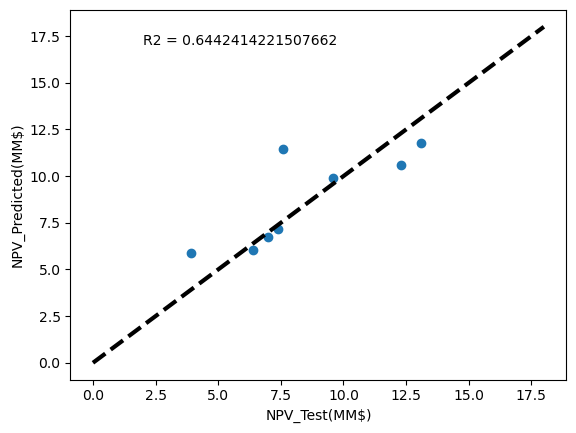

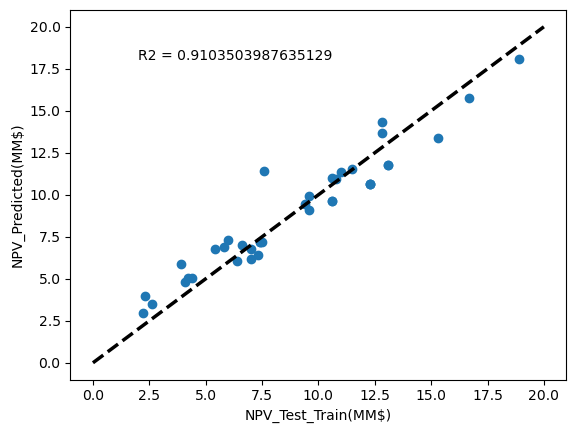

In [28]:
#Making Polynomial Model with Lasso parameters for the regression,
#and cross validation with 4 folds
model = make_pipeline(MinMaxScaler(),
                      PolynomialFeatures(3,interaction_only=False),
                      LassoCV(eps=0.0005,n_alphas=10,max_iter=10000,cv=4))

model.fit(X_train,y_train)

#Predicting the outputs and calculating R2s

y_pred_Test = np.array(model.predict(X_test))
test_scoreTest = model.score(X_test,y_test)
y_Pred_Test_Train = np.array(model.predict(X))
test_scoreTest_Train = model.score(X,y)

#Plotting the Outputs
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred_Test)
ax.plot([0, 18], [0, 18], 'k--', lw = 3)
ax.set_xlabel('NPV_Test(MM$)')
ax.set_ylabel('NPV_Predicted(MM$)')
plt.text(2,17,"R2 = "+ str(test_scoreTest).format("%.2f"))
plt.show()

fig, ax = plt.subplots()
ax.scatter(y,y_Pred_Test_Train)
ax.plot([0, 20], [0, 20], 'k--', lw = 2.5)
ax.set_xlabel('NPV_Test_Train(MM$)')
ax.set_ylabel('NPV_Predicted(MM$)')
plt.text(2,18,"R2 = " + str(test_scoreTest_Train ).format("%.2f"))
plt.show()

C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\AppData\Local\Temp\ipykernel_10768\984997943.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = model.predict(item.reshape(1,-1))
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\AppData\Local\Temp\ipykernel_10768\984997943.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Dep

Text(0.5, 0.92, 'NPV(MM$)')

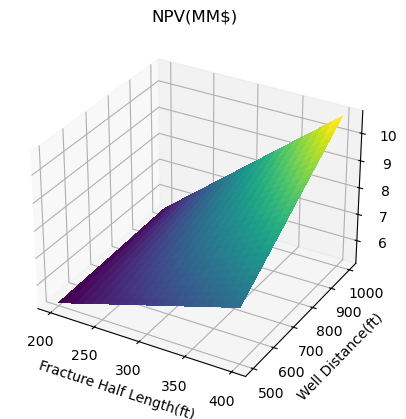

In [29]:
# Plot 3D surface for variable Fracture half-length(FH) and #Well
#Distance(WD)
from mpl_toolkits.mplot3d import axes3d
n = 20
m = 25
FH_vals = np.linspace(200,400,n+1)
WD_vals = np.linspace(500,1000,m+1)

FH,WD = np.meshgrid(FH_vals, WD_vals)
z = np.zeros_like(FH)

item = np.array([0.0]*6)
item[0] = .06
item[1] = 10e-05
item[3] = 26
item[4] = 40

for i in range(m+1):
    for j in range(n+1):
        item[2] = FH[i,j]
        item[5] = WD[i,j]
        z[i,j] = model.predict(item.reshape(1,-1))


fig = plt.figure()

#adding 3d for subplot 1,1,1
ax0 = fig.add_subplot(111, projection = '3d')
surf = ax0.plot_surface(FH, WD, z, rstride = 1, cstride = 1, cmap = 'viridis',
                        linewidth = 0, antialiased = False)

ax0.set_xlabel('Fracture Half Length(ft)')
ax0.set_ylabel('Well Distance(ft)')
ax0.set_title('NPV(MM$)')

# Important Notice
* It is observed in Fig. 9.18 that high NPV values occur at high fracture halflengths and long well distances.

* In Python, `"pyswarm"` package can be used
to perform PSO - Particle Swarm Optimization.

* Pyswarm should be installed by `"pip install
pyswarm"` command.

In [32]:
from pyswarm import pso

theta = 10e-10
lb = np.array([0.06, 10e-05, 200, 26, 40, 500])
ub = np.array([0.06, 10e-05, 400, 26, 40, 1000])
ub += theta

def f(X):
    return -model.predict(X.reshape(1,-1))


xopt, fopt = pso(f, lb, ub,swarmsize = 200, omega = 0.3, phip = .5, 
                 phig = 0.7, maxiter = 1000, minstep = 1e-8)

print(xopt)
print(fopt)

Stopping search: Swarm best position change less than 1e-08
[6.00000005e-02 1.00001000e-04 4.00000000e+02 2.60000000e+01
 4.00000000e+01 1.00000000e+03]
[-10.70322397]


C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Emmanuel Nkrumah\anaconda3\Lib\site-packages\s